## Carga de librerías

In [1]:
import datetime  # Importar datetime para manipulación de fechas y horas
import joblib  # Para utilizar joblib en sys.modules
import re  # Importar re para operaciones de expresiones regulares
import sys  # Para utilizar sys.modules
import numpy as np  # Importar NumPy para operaciones numéricas
import pandas as pd  # Importar Pandas para manipulación de datos
import matplotlib.pyplot as plt  # Importar Matplotlib para visualización de datos
import matplotlib as mpl  # Importar Matplotlib como mpl
import seaborn as sns  # Importar Seaborn para visualización estadística

from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # Importar SequentialFeatureSelector de mlxtend para selección de características
from sklearn.model_selection import train_test_split  # Importar train_test_split para dividir datos en conjuntos de entrenamiento y prueba
from sklearn.linear_model import LinearRegression  # Importar LinearRegression para modelado de regresión lineal
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Importar StandardScaler y LabelEncoder para preprocesamiento de datos
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, mean_squared_log_error, r2_score  # Importar métricas de evaluación de modelos
from sklearn.linear_model import Lasso, Ridge  # Importar Lasso y Ridge para modelado de regresión con regularización
from sklearn.ensemble import RandomForestRegressor  # Importar RandomForestRegressor para modelado de regresión con random forest

pd.options.mode.chained_assignment = None  # Desactiva la advertencia SettingWithCopyWarning

## Carga de Dataset

In [2]:
# Primero levantamos nuestro dataset desde github
url = "https://raw.githubusercontent.com/JnAlvarez/CH-Clases/main/New_York_cars.csv"
df = pd.read_csv(url)

## Primera visualización

In [3]:
# Exploramos someramente nuestro dataset para hacernos una idea de los datos aquí contenidos.
print("------------------------ SHAPE ------------------------")
print(df.shape)
print("------------------------ DESCRIBE ---------------------")
print(df.describe())
print("------------------------ INFO -------------------------")
print(df.info())
print("------------------------ NULL -------------------------")
print(df.isnull().sum())

------------------------ SHAPE ------------------------
(175490, 24)
------------------------ DESCRIBE ---------------------
              money        Mileage           Year
count  1.754900e+05  175443.000000  175490.000000
mean   3.435422e+04   51195.466203    2018.551900
std    2.350952e+04   43350.071628       3.136994
min    1.895000e+03       0.000000    2012.000000
25%    1.999100e+04   15170.500000    2016.000000
50%    2.899000e+04   44328.000000    2019.000000
75%    4.199000e+04   78484.500000    2021.000000
max    2.200000e+06  763474.000000    2023.000000
------------------------ INFO -------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175490 entries, 0 to 175489
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   new&used             175490 non-null  object 
 1   name                 175490 non-null  object 
 2   money                175490 non-null  int64  
 3 

In [4]:
print("------------------------ HEAD -------------------------")
print(df.head())

------------------------ HEAD -------------------------
  new&used                                  name  money  \
0      New               2023 Acura Integra Base  33095   
1      New                 2023 Acura Mdx A-Spec  61745   
2      New  2023 Acura Integra A-Spec Technology  38095   
3      New                 2023 Acura Tlx A-Spec  47995   
4      New                 2023 Acura Tlx A-Spec  47995   

             Exterior color Interior color Drivetrain     MPG Fuel type  \
0   Liquid Carbon Metallic          Ebony         Fwd   30–37  Gasoline   
1     Majestic Black Pearl          Ebony         Awd   19–25  Gasoline   
2     Majestic Black Pearl          Ebony         Fwd   26–36  Gasoline   
3     Majestic Black Pearl          Ebony         Fwd   22–30  Gasoline   
4     Platinum White Pearl            Red         Fwd   22–30  Gasoline   

         Transmission                      Engine  ...  \
0       Automatic Cvt  1.5L I4 16V Gdi Dohc Turbo  ...   
1  10-Speed Automatic 

## Estructurando el dataset (Feature Engineering Parte 1)

Este proyecto solo considerará el precio de los automóviles usados, por lo tanto, vamos a visualizar la cantidad de entradas de automóviles nuevos y las eliminaremos.

In [5]:
df['new&used'].value_counts()

new&used
Used                       135972
New                         29280
Mercedes-Benz Certified       778
Infiniti Certified            705
Porsche Certified             659
Toyota Certified              629
Volvo Certified               617
Honda Certified               615
Cadillac Certified            608
Bmw Certified                 580
Nissan Certified              501
Buick Certified               498
Volkswagen Certified          496
Subaru Certified              445
Jeep Certified                427
Acura Certified               416
Gmc Certified                 375
Kia Certified                 358
Ford Certified                354
Dodge Certified               323
Chevrolet Certified           316
Chrysler Certified            298
Ram Certified                 236
Mitsubishi Certified            4
Name: count, dtype: int64

In [6]:
df = df[df['new&used'] != 'New']
df['new&used'].value_counts()

new&used
Used                       135972
Mercedes-Benz Certified       778
Infiniti Certified            705
Porsche Certified             659
Toyota Certified              629
Volvo Certified               617
Honda Certified               615
Cadillac Certified            608
Bmw Certified                 580
Nissan Certified              501
Buick Certified               498
Volkswagen Certified          496
Subaru Certified              445
Jeep Certified                427
Acura Certified               416
Gmc Certified                 375
Kia Certified                 358
Ford Certified                354
Dodge Certified               323
Chevrolet Certified           316
Chrysler Certified            298
Ram Certified                 236
Mitsubishi Certified            4
Name: count, dtype: int64

Con esto hemos dejado solo los datos de los automóviles usados en nuestro dataset.

Con el head que hemos hecho pudimos observar que la columna "currency" parece tener información sobre la moneda en la que se encuentra el precio del automóvil, exploraremos dicha columna para entender como se encuentra distribuída.

In [7]:
df['currency'].value_counts()

currency
$    146210
Name: count, dtype: int64

Como podemos observar, todos los datos contenidos se encuentran en la misma divisa, lo que hace irrelevante esta columna, por lo que la eliminamos.

In [8]:
df = df.drop('currency', axis=1)
print("------------------------ INFO -------------------------")
print(df.info())

------------------------ INFO -------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 146210 entries, 60 to 175489
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   new&used             146210 non-null  object 
 1   name                 146210 non-null  object 
 2   money                146210 non-null  int64  
 3   Exterior color       144492 non-null  object 
 4   Interior color       133643 non-null  object 
 5   Drivetrain           145727 non-null  object 
 6   MPG                  134117 non-null  object 
 7   Fuel type            144935 non-null  object 
 8   Transmission         145838 non-null  object 
 9   Engine               145923 non-null  object 
 10  Mileage              146163 non-null  float64
 11  Convenience          118629 non-null  object 
 12  Entertainment        139875 non-null  object 
 13  Exterior             133055 non-null  object 
 14  Safety          

Podemos ver que la columna Clean title tiene muy pocos valores relativo a las demás columnas, por lo que revisaremos los null del mismo.

In [9]:
print("-------------- NULL (%) ---------------")
df.isnull().sum()/df.shape[0] * 100

-------------- NULL (%) ---------------


new&used                0.000000
name                    0.000000
money                   0.000000
Exterior color          1.175022
Interior color          8.595171
Drivetrain              0.330347
MPG                     8.270980
Fuel type               0.872033
Transmission            0.254429
Engine                  0.196293
Mileage                 0.032146
Convenience            18.863963
Entertainment           4.332809
Exterior                8.997333
Safety                  0.218863
Seating                32.404760
Accidents or damage    15.931879
Clean title            87.586348
1-owner vehicle        16.085767
Personal use only      15.932563
brand                   0.000000
Year                    0.000000
Model                   0.000000
dtype: float64

In [10]:
df['Clean title'].value_counts()

Clean title
Yes    17856
No       294
Name: count, dtype: int64

Según el dataset, esta columna contiene información sobre el estado legal del vehículo, al no poseer información relevante para nuestro estudio, además de poseer casi un 88% de nan, eliminaremos esta columna.

In [11]:
df = df.drop('Clean title', axis=1)
print("------------------------ INFO -------------------------")
print(df.info())

------------------------ INFO -------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 146210 entries, 60 to 175489
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   new&used             146210 non-null  object 
 1   name                 146210 non-null  object 
 2   money                146210 non-null  int64  
 3   Exterior color       144492 non-null  object 
 4   Interior color       133643 non-null  object 
 5   Drivetrain           145727 non-null  object 
 6   MPG                  134117 non-null  object 
 7   Fuel type            144935 non-null  object 
 8   Transmission         145838 non-null  object 
 9   Engine               145923 non-null  object 
 10  Mileage              146163 non-null  float64
 11  Convenience          118629 non-null  object 
 12  Entertainment        139875 non-null  object 
 13  Exterior             133055 non-null  object 
 14  Safety          

Ahora realizaremos algunos cambios, principalmente por comodidad de trabajo, como poner en mayúsculas todos los títulos de columnas, renombrar la columna "money" por "Price" ya que esta es la columna que contiene el valor de cada vehículo, etc.

In [12]:
# Crear un diccionario para mapear los nombres de columnas antiguas a los nuevos nombres
nuevos_nombres = {
    'new&used': 'Usado (tipo)',
    'money': 'Price',
    'name': 'Name',
    'brand': 'Brand'
}

# Cambiar los nombres de las columnas utilizando el diccionario y el método rename
df = df.rename(columns=nuevos_nombres)

# Imprimir el DataFrame con los nuevos nombres de columnas
print("------------------------ INFO -------------------------")
print(df.info())

------------------------ INFO -------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 146210 entries, 60 to 175489
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Usado (tipo)         146210 non-null  object 
 1   Name                 146210 non-null  object 
 2   Price                146210 non-null  int64  
 3   Exterior color       144492 non-null  object 
 4   Interior color       133643 non-null  object 
 5   Drivetrain           145727 non-null  object 
 6   MPG                  134117 non-null  object 
 7   Fuel type            144935 non-null  object 
 8   Transmission         145838 non-null  object 
 9   Engine               145923 non-null  object 
 10  Mileage              146163 non-null  float64
 11  Convenience          118629 non-null  object 
 12  Entertainment        139875 non-null  object 
 13  Exterior             133055 non-null  object 
 14  Safety          

Por simple comodidad reordenaremos las columnas.

In [13]:
nuevo_orden_columnas = ['Name', 'Year', 'Brand', 'Model', 'Usado (tipo)', 'Price', 'Exterior color', 'Interior color',
                        'Drivetrain', 'MPG', 'Fuel type', 'Transmission', 'Engine', 'Mileage', 'Convenience', 'Entertainment',
                        'Exterior', 'Safety', 'Seating', 'Accidents or damage', '1-owner vehicle', 'Personal use only']

# Reorganizar las columnas en el DataFrame
df = df[nuevo_orden_columnas]

print("------------------------ INFO -------------------------")
print(df.info())

------------------------ INFO -------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 146210 entries, 60 to 175489
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Name                 146210 non-null  object 
 1   Year                 146210 non-null  int64  
 2   Brand                146210 non-null  object 
 3   Model                146210 non-null  object 
 4   Usado (tipo)         146210 non-null  object 
 5   Price                146210 non-null  int64  
 6   Exterior color       144492 non-null  object 
 7   Interior color       133643 non-null  object 
 8   Drivetrain           145727 non-null  object 
 9   MPG                  134117 non-null  object 
 10  Fuel type            144935 non-null  object 
 11  Transmission         145838 non-null  object 
 12  Engine               145923 non-null  object 
 13  Mileage              146163 non-null  float64
 14  Convenience     

#### Creación de columnas Dummy a partir de Columnas con información categórica

Como pudimos observar anteriormente existen varias columnas que contienen datos categóricos agrupados en una sola celda, esta información será de poca utilidad si la mantenemos de esta manera, por lo que iteraremos por cada una de ellas buscando las distintas características que contiene cada celda, creando una columna para cada característica que contendrá un 0 si la entrada posee dicha característica y un 1 si es que la posee.

In [14]:
print("------------------------ HEAD -------------------------")
print(df['Convenience'].head())
print("------------------------ HEAD -------------------------")
print(df['Entertainment'].head())
print("------------------------ HEAD -------------------------")
print(df['Seating'].head())
print("------------------------ HEAD -------------------------")
print(df['Safety'].head())
print("------------------------ HEAD -------------------------")
print(df['Exterior'].head())

------------------------ HEAD -------------------------
60                Adaptive Cruise ControlKeyless Start  
107      Adaptive Cruise ControlHeated SeatsNavigatio...
112      Adaptive Cruise ControlHeated SeatsNavigatio...
118      Adaptive Cruise ControlHeated SeatsHeated St...
140      Adaptive Cruise ControlHeated SeatsKeyless S...
Name: Convenience, dtype: object
------------------------ HEAD -------------------------
60         Apple CarPlay/Android AutoBluetoothUSB Port  
107      Apple CarPlay/Android AutoBluetoothPremium S...
112      Apple CarPlay/Android AutoBluetoothHomeLinkP...
118      Apple CarPlay/Android AutoBluetoothPremium S...
140      Apple CarPlay/Android AutoBluetoothPremium S...
Name: Entertainment, dtype: object
------------------------ HEAD -------------------------
60                                   Leather Seats  
107                       Leather SeatsMemory Seat  
112      Leather SeatsMemory SeatThird Row Seating  
118      Leather SeatsMemory SeatTh

In [15]:
# Crear columnas Dummy a partir de los datos contenidos en la columna "Convenience"
# Nombres a buscar
nombres_a_buscar = ['Adaptive Cruise Control', 'Heated Seats', 'Cooled Seats', 'Keyless Start', 
                    'Navigation System', 'Power Liftgate', 'Remote Start', 'Heated Steering Wheel']

# Crear una máscara booleana para cada columna en base a la columna 'Convenience'
mascaras = df['Convenience'].str.contains('|'.join(nombres_a_buscar), na=False)

# Asignar los valores a las columnas correspondientes
df.loc[mascaras, nombres_a_buscar] = 1
df[nombres_a_buscar] = df[nombres_a_buscar].fillna(0)

# Eliminar la columna 'Convenience'
df = df.drop(columns=['Convenience'])

In [16]:
# Crear columnas Dummy a partir de los datos contenidos en la columna "Entertainment"
# Nombres a buscar
nombres_a_buscar = ['Apple CarPlay/Android Auto', 'USB Port', 'Premium Sound System', 'Bluetooth', 'HomeLink', 'Rear Seat Entertainment']

# Crear una máscara booleana para cada columna en base a la columna 'Entertainment'
mascaras = df['Entertainment'].str.contains('|'.join(nombres_a_buscar), na=False)

# Asignar los valores a las columnas correspondientes
df.loc[mascaras, nombres_a_buscar] = 1
df[nombres_a_buscar] = df[nombres_a_buscar].fillna(0)

# Eliminar la columna 'Entertainment'
df = df.drop(columns=['Entertainment'])

In [17]:
# Crear columnas Dummy a partir de los datos contenidos en la columna "Seating"
# Nombres a buscar
nombres_a_buscar = ['Memory Seat', 'Third Row Seating', 'Leather Seats']

# Crear una máscara booleana para cada columna en base a la columna 'Seating'
mascaras = df['Seating'].str.contains('|'.join(nombres_a_buscar), na=False)

# Asignar los valores a las columnas correspondientes
df.loc[mascaras, nombres_a_buscar] = 1
df[nombres_a_buscar] = df[nombres_a_buscar].fillna(0)

# Eliminar la columna 'Seating'
df = df.drop(columns=['Seating'])

In [18]:
# Crear columnas Dummy a partir de los datos contenidos en la columna "Safety"
# Nombres a buscar
nombres_a_buscar = ['Blind Spot Monitor', 'Rear Cross Traffic Alert', 'Backup Camera', 'Lane Departure Warning']

# Crear una máscara booleana para cada columna en base a la columna 'Safety'
mascaras = df['Safety'].str.contains('|'.join(nombres_a_buscar), na=False)

# Asignar los valores a las columnas correspondientes
df.loc[mascaras, nombres_a_buscar] = 1
df[nombres_a_buscar] = df[nombres_a_buscar].fillna(0)

# Eliminar la columna 'Safety'
df = df.drop(columns=['Safety'])

In [19]:
# Crear columnas Dummy a partir de los datos contenidos en la columna "Exterior"
# Nombres a buscar
nombres_a_buscar = ['Alloy Wheels', 'Sunroof/Moonroof', 'Tow Hitch', 'Tow Hooks']

# Crear una máscara booleana para cada columna en base a la columna 'Exterior'
mascaras = df['Exterior'].str.contains('|'.join(nombres_a_buscar), na=False)

# Asignar los valores a las columnas correspondientes
df.loc[mascaras, nombres_a_buscar] = 1
df[nombres_a_buscar] = df[nombres_a_buscar].fillna(0)

# Eliminar la columna 'Exterior'
df = df.drop(columns=['Exterior'])

In [20]:
print("------------------------ INFO -------------------------")
print(df.info())

------------------------ INFO -------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 146210 entries, 60 to 175489
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        146210 non-null  object 
 1   Year                        146210 non-null  int64  
 2   Brand                       146210 non-null  object 
 3   Model                       146210 non-null  object 
 4   Usado (tipo)                146210 non-null  object 
 5   Price                       146210 non-null  int64  
 6   Exterior color              144492 non-null  object 
 7   Interior color              133643 non-null  object 
 8   Drivetrain                  145727 non-null  object 
 9   MPG                         134117 non-null  object 
 10  Fuel type                   144935 non-null  object 
 11  Transmission                145838 non-null  object 
 12  Engine              

### Tratamiento de NaN

Primero observaremos el porcentaje de NaN en cada columna.

In [21]:
print("-------------- NULL (%) ---------------")
df.isnull().sum()/df.shape[0] * 100

-------------- NULL (%) ---------------


Name                           0.000000
Year                           0.000000
Brand                          0.000000
Model                          0.000000
Usado (tipo)                   0.000000
Price                          0.000000
Exterior color                 1.175022
Interior color                 8.595171
Drivetrain                     0.330347
MPG                            8.270980
Fuel type                      0.872033
Transmission                   0.254429
Engine                         0.196293
Mileage                        0.032146
Accidents or damage           15.931879
1-owner vehicle               16.085767
Personal use only             15.932563
Adaptive Cruise Control        0.000000
Heated Seats                   0.000000
Cooled Seats                   0.000000
Keyless Start                  0.000000
Navigation System              0.000000
Power Liftgate                 0.000000
Remote Start                   0.000000
Heated Steering Wheel          0.000000


Podemos observar varias columnas con diversos porcentajes de valores NaN, primero eliminaremos las filas que contengan NaN en todas aquellas columnas con un porcentaje menor al 1%, ya que hacerlo no tendrá un impacto mayor en nuestro análisis, sobre todo teniendo en cuenta el tamaño de nuestro dataset.

In [22]:
df.dropna(subset = ["Drivetrain","Fuel type","Transmission","Engine","Mileage"], inplace = True)

print("-------------- NULL (%) ---------------")
df.isnull().sum()/df.shape[0] * 100

-------------- NULL (%) ---------------


Name                           0.000000
Year                           0.000000
Brand                          0.000000
Model                          0.000000
Usado (tipo)                   0.000000
Price                          0.000000
Exterior color                 1.159350
Interior color                 8.478570
Drivetrain                     0.000000
MPG                            7.880531
Fuel type                      0.000000
Transmission                   0.000000
Engine                         0.000000
Mileage                        0.000000
Accidents or damage           15.806105
1-owner vehicle               15.954402
Personal use only             15.806798
Adaptive Cruise Control        0.000000
Heated Seats                   0.000000
Cooled Seats                   0.000000
Keyless Start                  0.000000
Navigation System              0.000000
Power Liftgate                 0.000000
Remote Start                   0.000000
Heated Steering Wheel          0.000000


Observamos un 1.1% de valores NaN en la columna "Exterior color" y un 8.6% en la columna "Interior color", como estas columnas nos entregan información que puede ser de utilidad y los valores faltantes no llega al 10%, siendo esta una columna con datos categóricos, reemplazaremos los datos faltantes (NaN) por la moda de cada columna.

In [23]:
df["Exterior color"].fillna(df["Exterior color"].mode()[0], inplace = True)
df["Interior color"].fillna(df["Interior color"].mode()[0], inplace = True)

print("-------------- NULL (%) ---------------")
df.isnull().sum()/df.shape[0] * 100

-------------- NULL (%) ---------------


Name                           0.000000
Year                           0.000000
Brand                          0.000000
Model                          0.000000
Usado (tipo)                   0.000000
Price                          0.000000
Exterior color                 0.000000
Interior color                 0.000000
Drivetrain                     0.000000
MPG                            7.880531
Fuel type                      0.000000
Transmission                   0.000000
Engine                         0.000000
Mileage                        0.000000
Accidents or damage           15.806105
1-owner vehicle               15.954402
Personal use only             15.806798
Adaptive Cruise Control        0.000000
Heated Seats                   0.000000
Cooled Seats                   0.000000
Keyless Start                  0.000000
Navigation System              0.000000
Power Liftgate                 0.000000
Remote Start                   0.000000
Heated Steering Wheel          0.000000


In [24]:
print("------------------------ INFO -------------------------")
print(df.info())

------------------------ INFO -------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 144305 entries, 60 to 175489
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        144305 non-null  object 
 1   Year                        144305 non-null  int64  
 2   Brand                       144305 non-null  object 
 3   Model                       144305 non-null  object 
 4   Usado (tipo)                144305 non-null  object 
 5   Price                       144305 non-null  int64  
 6   Exterior color              144305 non-null  object 
 7   Interior color              144305 non-null  object 
 8   Drivetrain                  144305 non-null  object 
 9   MPG                         132933 non-null  object 
 10  Fuel type                   144305 non-null  object 
 11  Transmission                144305 non-null  object 
 12  Engine              

Ahora trataremos las columnas que aún tienen NaN, en este caso: "MPG", "Accidents or damage", "1-owner vehicle" y "Personal use only", como podemos observar todos ellos tienen datos tipo "object" lo que nos da a entender que contienen variables categóricas, al tener altos porcentajes de NaN y entregar información relevante para nuestro estudio, reemplazaremos los NaN con la moda de cada columna.

In [25]:
df["MPG"].fillna(df["MPG"].mode()[0], inplace = True)
df["Accidents or damage"].fillna(df["Accidents or damage"].mode()[0], inplace = True)
df["1-owner vehicle"].fillna(df["1-owner vehicle"].mode()[0], inplace = True)
df["Personal use only"].fillna(df["Personal use only"].mode()[0], inplace = True)

print("-------------- NULL (%) ---------------")
df.isnull().sum()/df.shape[0] * 100

-------------- NULL (%) ---------------


Name                          0.0
Year                          0.0
Brand                         0.0
Model                         0.0
Usado (tipo)                  0.0
Price                         0.0
Exterior color                0.0
Interior color                0.0
Drivetrain                    0.0
MPG                           0.0
Fuel type                     0.0
Transmission                  0.0
Engine                        0.0
Mileage                       0.0
Accidents or damage           0.0
1-owner vehicle               0.0
Personal use only             0.0
Adaptive Cruise Control       0.0
Heated Seats                  0.0
Cooled Seats                  0.0
Keyless Start                 0.0
Navigation System             0.0
Power Liftgate                0.0
Remote Start                  0.0
Heated Steering Wheel         0.0
Apple CarPlay/Android Auto    0.0
USB Port                      0.0
Premium Sound System          0.0
Bluetooth                     0.0
HomeLink      

## Estructurando el dataset (Feature Engineering Parte 2)

Habiendo tratado los NaN seguiremos con la estructuración de nuestro dataset y la ingeniería de características. Ahora crearemos columnas Dummy para las columnas "Exterior color" e "Interior color", pero lo haremos agrupando los datos en grupos por color, asignando un 1 cuando dicho color se encuentre presente en la columna correspondiente y un cero en caso de no contenerlo. Si la columna de origen no contiene ninguna de los colores filtrados se pondrá un 1 en las columnas "Color_Other" o "IntColor_Other" según corresponda.

In [26]:
# Convertir todas las palabras a minúsculas para que no se diferencie entre mayúsculas y minúsculas
df['Exterior color'] = df['Exterior color'].str.lower()

# Crear las columnas específicas y asignar 0 a todas las filas
df['Color_Black'] = 0
df['Color_White'] = 0
df['Color_Gray'] = 0
df['Color_Red'] = 0
df['Color_Blue'] = 0
df['Color_Brown'] = 0
df['Color_Green'] = 0
df['Color_Gold'] = 0
df['Color_Orange'] = 0
df['Color_Yellow'] = 0
df['Color_Other'] = 0

# Asignar 1 a las columnas correspondientes
df.loc[df['Exterior color'].str.contains(r'black|graphite|ebony'), 'Color_Black'] = 1
df.loc[df['Exterior color'].str.contains(r'white|blizzard'), 'Color_White'] = 1
df.loc[df['Exterior color'].str.contains(r'gray|silver|gun|platinum|granite'), 'Color_Gray'] = 1
df.loc[df['Exterior color'].str.contains(r'red|maroon'), 'Color_Red'] = 1
df.loc[df['Exterior color'].str.contains(r'blue'), 'Color_Blue'] = 1
df.loc[df['Exterior color'].str.contains(r'brown'), 'Color_Brown'] = 1
df.loc[df['Exterior color'].str.contains(r'green'), 'Color_Green'] = 1
df.loc[df['Exterior color'].str.contains(r'gold'), 'Color_Gold'] = 1
df.loc[df['Exterior color'].str.contains(r'orange'), 'Color_Orange'] = 1
df.loc[df['Exterior color'].str.contains(r'yellow'), 'Color_Yellow'] = 1

# Si no coincide con ninguna categoría, se considera 'Other'
df.loc[(df['Color_Black'] + df['Color_White'] + df['Color_Gray'] + df['Color_Red'] +
        df['Color_Blue'] + df['Color_Brown'] + df['Color_Green'] +
        df['Color_Gold'] + df['Color_Orange'] + df['Color_Yellow']) == 0, 'Color_Other'] = 1

# Convertir las columnas a tipo de dato booleano
columnas_booleanas = ['Color_Black', 'Color_White', 'Color_Gray', 'Color_Red', 'Color_Blue',
                      'Color_Brown', 'Color_Green', 'Color_Gold', 'Color_Orange', 'Color_Yellow', 'Color_Other']
df[columnas_booleanas] = df[columnas_booleanas].astype(bool)

In [27]:
# Convertir todas las palabras a minúsculas para que no se diferencie entre mayúsculas y minúsculas
df['Interior color'] = df['Interior color'].str.lower()

# Crear las columnas específicas y asignar 0 a todas las filas
df['IntColor_Black'] = 0
df['IntColor_White'] = 0
df['IntColor_Gray'] = 0
df['IntColor_Brown'] = 0
df['IntColor_LightBrown'] = 0
df['IntColor_Red'] = 0
df['IntColor_Other'] = 0

# Asignar 1 a las columnas correspondientes
df.loc[df['Interior color'].str.contains(r'black|ebony|charcoal'), 'IntColor_Black'] = 1
df.loc[df['Interior color'].str.contains(r'white|ivory|snow|cream'), 'IntColor_White'] = 1
df.loc[df['Interior color'].str.contains(r'gray|silver|graphite|ash|stone|alloy|steel|rock|platinum|titanium'), 'IntColor_Gray'] = 1
df.loc[df['Interior color'].str.contains(r'brown|walnut|chestnut|nougat|cognac|espresso'), 'IntColor_Brown'] = 1
df.loc[df['Interior color'].str.contains(r'beige|tan|parchment|wheat|cappuccino|almond|sand|amber|camel'), 'IntColor_LightBrown'] = 1
df.loc[df['Interior color'].str.contains(r'red'), 'IntColor_Red'] = 1

# Si no coincide con ninguna categoría, se considera 'Other'
df.loc[(df['IntColor_Black'] + df['IntColor_White'] + df['IntColor_Gray'] + df['IntColor_Brown'] +
        df['IntColor_LightBrown'] + df['IntColor_Red']) == 0, 'IntColor_Other'] = 1

# Convertir las columnas a tipo de dato booleano
columnas_booleanas_interior = ['IntColor_Black', 'IntColor_White', 'IntColor_Gray', 'IntColor_Brown',
                               'IntColor_LightBrown', 'IntColor_Red', 'IntColor_Other']
df[columnas_booleanas_interior] = df[columnas_booleanas_interior].astype(bool)

In [28]:
print("------------------------ INFO -------------------------")
print(df.info())

------------------------ INFO -------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 144305 entries, 60 to 175489
Data columns (total 60 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        144305 non-null  object 
 1   Year                        144305 non-null  int64  
 2   Brand                       144305 non-null  object 
 3   Model                       144305 non-null  object 
 4   Usado (tipo)                144305 non-null  object 
 5   Price                       144305 non-null  int64  
 6   Exterior color              144305 non-null  object 
 7   Interior color              144305 non-null  object 
 8   Drivetrain                  144305 non-null  object 
 9   MPG                         144305 non-null  object 
 10  Fuel type                   144305 non-null  object 
 11  Transmission                144305 non-null  object 
 12  Engine              

Ahora analizaremos la columna Price, esta es nuestra variable objetivo así que queremos que esté en la mejor forma posible.

In [29]:
# Configurar Pandas para que no use notación científica
pd.set_option('display.float_format', '{:.2f}'.format)

print("------------------------ DESCRIBE -------------------------")
df["Price"].describe()

------------------------ DESCRIBE -------------------------


count    144305.00
mean      30248.87
std       20963.47
min        1895.00
25%       18650.00
50%       25995.00
75%       35990.00
max     2200000.00
Name: Price, dtype: float64

Podemos observar que el valor mínimo y máximo están muy separados, además el valor máximo se escapa demasiado del percentil 75. Por ello eliminaremos los outliers.

In [30]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

print("------------------------ SHAPE ------------------------")
print(df.shape)

------------------------ SHAPE ------------------------
(137367, 60)


In [31]:
print("------------------------ DESCRIBE -------------------------")
df["Price"].describe()

------------------------ DESCRIBE -------------------------


count   137367.00
mean     27105.63
std      11605.86
min       1895.00
25%      18000.00
50%      25223.00
75%      33998.00
max      62000.00
Name: Price, dtype: float64

Podemos observar que ahora los valores se encuentran mucho más cerca los unos de los otros. Sabiendo que Price es nuestra variable objetivo, la graficaremos para ver su distribución.

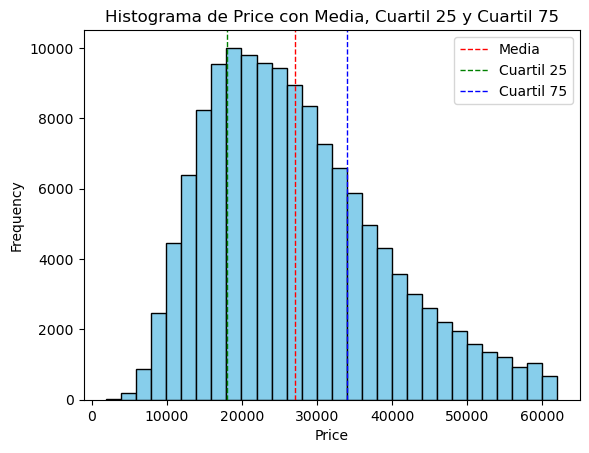

In [32]:
# Calcular la media, cuartil 25 y cuartil 75
mean_price = df['Price'].mean()
q25 = df['Price'].quantile(0.25)
q75 = df['Price'].quantile(0.75)

# Crear el histograma
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')

# Añadir líneas verticales para la media, cuartil 25 y cuartil 75
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(q25, color='green', linestyle='dashed', linewidth=1, label='Cuartil 25')
plt.axvline(q75, color='blue', linestyle='dashed', linewidth=1, label='Cuartil 75')

# Añadir leyenda y etiquetas
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histograma de Price con Media, Cuartil 25 y Cuartil 75')

# Mostrar el histograma
plt.show()

Como podemos ver, la distribución de la variable objetico presenta un sesgo a la derecha, por lo cual aplicaremos una transformación logarítmica y graficaremos nuevamente.

In [33]:
# Aplicar la transformación logarítmica a la columna "Price"
df['Price_log'] = np.log(df['Price'])

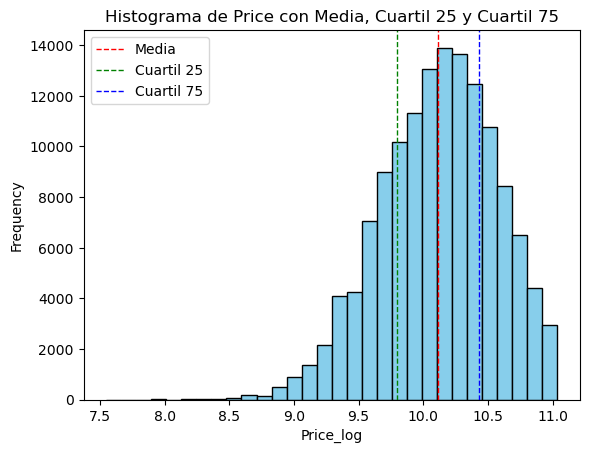

In [34]:
# Calcular la media, cuartil 25 y cuartil 75
mean_price = df['Price_log'].mean()
q25 = df['Price_log'].quantile(0.25)
q75 = df['Price_log'].quantile(0.75)

# Crear el histograma
plt.hist(df['Price_log'], bins=30, color='skyblue', edgecolor='black')

# Añadir líneas verticales para la media, cuartil 25 y cuartil 75
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(q25, color='green', linestyle='dashed', linewidth=1, label='Cuartil 25')
plt.axvline(q75, color='blue', linestyle='dashed', linewidth=1, label='Cuartil 75')

# Añadir leyenda y etiquetas
plt.legend()
plt.xlabel('Price_log')
plt.ylabel('Frequency')
plt.title('Histograma de Price con Media, Cuartil 25 y Cuartil 75')

# Mostrar el histograma
plt.show()

De esta manera, se puede apreciar una distribución más similar a una distribución "Normal", obteniendo una forma más simétrica de la variable.

Ahora trataremos la columna "MPG", como hemos visto esta posee strings con el rango de Millas por Galón de cada uno de los automóviles, esta es una información muy relevante para nuestro estudio, pero en el estado actual no nos es muy útil, es por ello que para cada rango calcularemos el promedio y lo reemplazaremos en la columna.

In [35]:
def promedio_rango(rango):
    if isinstance(rango, str):
        valores = [float(valor) if '.' in valor else int(valor) for valor in rango.replace('–', '-').split('-')]
        return sum(valores) / len(valores)
    else:
        return rango  # Si el valor no es una cadena, simplemente lo retornamos

# Aplicamos la función a la columna 'MPG' y creamos la nueva columna 'MpG'
df['MPG_mean'] = df['MPG'].apply(promedio_rango)

print(df["MPG"].head())
print(df["MPG_mean"].head())

60      29–36
107     29–36
112     19–25
118     19–25
140     29–36
Name: MPG, dtype: object
60    32.50
107   32.50
112   22.00
118   22.00
140   32.50
Name: MPG_mean, dtype: float64


Observamos que nuestra función se ha aplicado correctamente y ahora tenemos una columna "MPG_mean" que contiene el promedio del rango correspondiente en la columna "MPG" y ahora esta columna es del tipo float64. Revisaremos esta nueva columna buscando valores atípicos.

In [36]:
print("------------------------ DESCRIBE -------------------------")
df["MPG_mean"].describe()

------------------------ DESCRIBE -------------------------


count   137367.00
mean        24.54
std          5.65
min          0.00
25%         21.50
50%         23.50
75%         27.50
max        127.50
Name: MPG_mean, dtype: float64

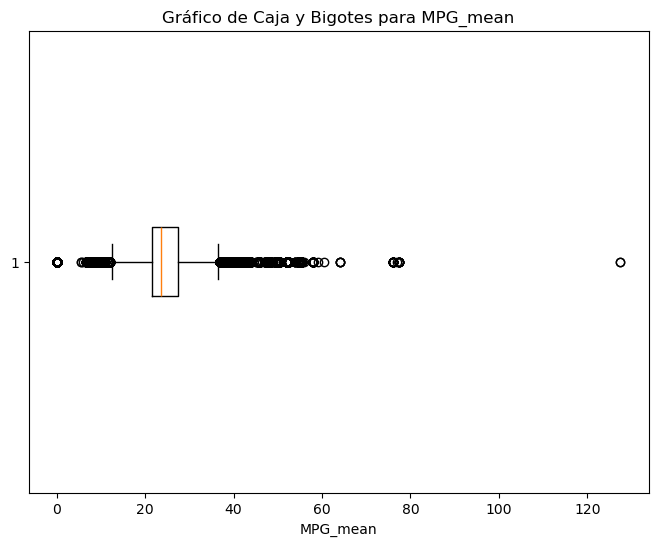

In [37]:
# Crear el gráfico de caja y bigotes
plt.figure(figsize=(8, 6))
plt.boxplot(df['MPG_mean'], vert=False)

# Añadir título y etiqueta al eje x
plt.title('Gráfico de Caja y Bigotes para MPG_mean')
plt.xlabel('MPG_mean')

# Mostrar el gráfico
plt.show()

"Describe" nos muestra valores mínimos de 0 y un máximo de 127, mientras los percentiles 25, 50 y 75 rondan todos el rango de 20-30, además el gráfico de caja y bigotes nos muestra gran cantidad de outliers. Calcularemos entonces los rangos intercuartílicos y eliminaremos los outliers.

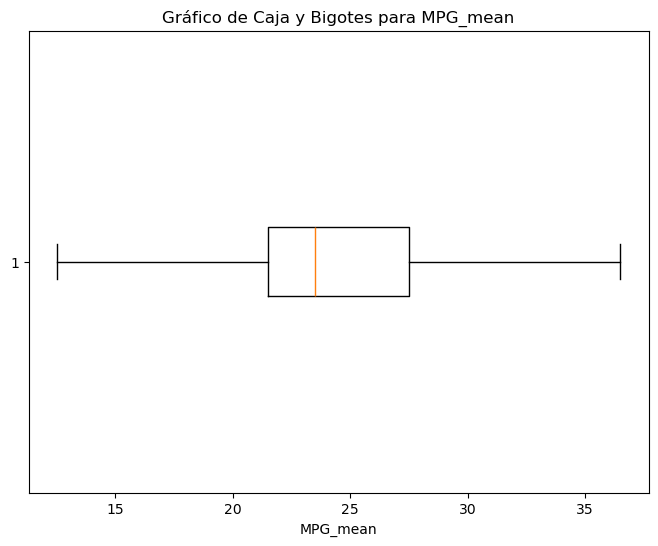

In [38]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['MPG_mean'].quantile(0.25)
Q3 = df['MPG_mean'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
df = df[(df['MPG_mean'] >= lower_bound) & (df['MPG_mean'] <= upper_bound)]

# Crear el gráfico de caja y bigotes
plt.figure(figsize=(8, 6))
plt.boxplot(df['MPG_mean'], vert=False)

# Añadir título y etiqueta al eje x
plt.title('Gráfico de Caja y Bigotes para MPG_mean')
plt.xlabel('MPG_mean')

# Mostrar el gráfico
plt.show()

In [39]:
print("------------------------ DESCRIBE -------------------------")
df["MPG_mean"].describe()

------------------------ DESCRIBE -------------------------


count   133426.00
mean        24.32
std          4.44
min         12.50
25%         21.50
50%         23.50
75%         27.50
max         36.50
Name: MPG_mean, dtype: float64

Observamos una variable mucho mejor distribuída y sin outliers.

### Seguimos creando Dummies

Seguiremos creando Dummies para aquellas columnas con variables categóricas, que sean relevantes para nuestro estudio y que no contengan demasiadas variables únicas (lo que generaría demasiadas columnas Dummy).

In [40]:
# Contar los valores únicos en la columna "columna"
value_counts1 = len(df['Drivetrain'].unique())
value_counts2 = len(df['Fuel type'].unique())
value_counts3 = len(df['Transmission'].unique())
value_counts4 = len(df['Engine'].unique())
value_counts5 = len(df['Accidents or damage'].unique())
value_counts6 = len(df['1-owner vehicle'].unique())
value_counts7 = len(df['Personal use only'].unique())

print("Recuento de valores únicos: Drivetrain")
print(value_counts1)
print("Recuento de valores únicos: Fuel type")
print(value_counts2)
print("Recuento de valores únicos: Transmission")
print(value_counts3)
print("Recuento de valores únicos: Engine")
print(value_counts4)
print("Recuento de valores únicos: Accidents or damage")
print(value_counts5)
print("Recuento de valores únicos: 1-owner vehicle")
print(value_counts6)
print("Recuento de valores únicos: Personal use only")
print(value_counts7)

Recuento de valores únicos: Drivetrain
4
Recuento de valores únicos: Fuel type
13
Recuento de valores únicos: Transmission
476
Recuento de valores únicos: Engine
1011
Recuento de valores únicos: Accidents or damage
2
Recuento de valores únicos: 1-owner vehicle
2
Recuento de valores únicos: Personal use only
2


Se observa que tanto "Transmission" como "Engine" tiene una cantidad muy elevada de valores únicos por lo que sería muy complicado crear columnas Dummy a partir de ellas, afortunadamente son las menos relevantes para nuestro estudio, continuaremos creando las columnas Dummy para las otras columnas con menor número de valores únicos.

In [41]:
# Crear variables dummy para las columnas especificadas
dummy_columns = ["Drivetrain", "Fuel type", "Accidents or damage", "1-owner vehicle", "Personal use only"]
df = pd.get_dummies(df, columns=dummy_columns)

print("------------------------ INFO -------------------------")
print(df.info())

------------------------ INFO -------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 133426 entries, 60 to 175489
Data columns (total 80 columns):
 #   Column                                                      Non-Null Count   Dtype  
---  ------                                                      --------------   -----  
 0   Name                                                        133426 non-null  object 
 1   Year                                                        133426 non-null  int64  
 2   Brand                                                       133426 non-null  object 
 3   Model                                                       133426 non-null  object 
 4   Usado (tipo)                                                133426 non-null  object 
 5   Price                                                       133426 non-null  int64  
 6   Exterior color                                              133426 non-null  object 
 7   Interior color        

Con esto damos por finalizada la estructuración del dataset. La ingeniería de características parece haber terminado, pero puede que más adelante debamos arreglar algo más.

## EDA (Exploratory Data Analysis - Análisis Exploratorio de Datos)

In [ ]:
Ahora que nuestro dataset se encuentra bien estructurado, se hizo tratamiento de NaN y se desarrolló ingeniería de características podemos tranquilam